# Линейная регрессия и стохастический градиентный спуск

Будем прогнозировать выручку компании в зависимости от уровня ее инвестиций в рекламу по TV, в газетах и по радио.

## Мы научимся:
- решать задачу линейной регрессии
- реализовывать стохастический градиентный спуск 
- решать задачу линейной регрессии аналитически

## Введение
Линейная регрессия - один из наиболее хорошо изученных методов машинного обучения, позволяющий прогнозировать значения количественного признака в виде линейной комбинации прочих признаков с параметрами - весами модели. Оптимальные (в смысле минимальности некоторого функционала ошибки) параметры линейной регрессии можно найти аналитически с помощью нормального уравнения или численно с помощью методов оптимизации.  

Линейная регрессия использует простой функционал качества - среднеквадратичную ошибку. Мы будем работать с выборкой, содержащей 3 признака. Для настройки (поиска) параметров (весов) модели решается следующая задача - минимизация функции потерь:
$$J(\theta) = \frac{1}{2m}\sum_{i=1}^m{{(y_i - (\theta_0 + \theta_1x_{i1} + \theta_2x_{i2} +  \theta_3x_{i3}))}^2} \rightarrow \min_{\theta_0, \theta_1, \theta_2, \theta_3},$$
где $x_{i1}, x_{i2}, x_{i3}$ - значения признаков $i$-го объекта,   
$y_i$ - значение целевого признака $i$-го объекта,  
$m$ - число наблюдений в обучающей выборке.

## Градиентный спуск
Параметры $\theta_0, \theta_1, \theta_2, \theta_3$, по которым минимизируется среднеквадратичная ошибка, можно находить численно с помощью градиентного спуска.
Градиентный шаг для весов будет выглядеть следующим образом:
$$\theta_0 \leftarrow \theta_0 + \frac{\alpha}{m} \sum_{i=1}^m{{(y_i - (\theta_0 + \theta_1x_{i1} + \theta_2x_{i2} +  \theta_3x_{i3}))}}$$
$$\theta_j \leftarrow \theta_j + \frac{\alpha}{m} \sum_{i=1}^m{{x_{ij}(y_i - (\theta_0 + \theta_1x_{i1} + \theta_2x_{i2} +  \theta_3x_{i3}))}},\ j \in \{1,2,3\}$$
Здесь $\alpha$ - learning rate или шаг градиентного спуска; гиперпараметр модели, то есть такой, что мы просто выбираем перед обучением и не находим в ходе обучения как $\theta_i$.

**Напомню аналогию**: мы стоим наверху горы с закрытыми глазами и нам надо спуститься в наиболее низкую точку за наименьшее кол-во шагов. Мы сначала нащупываем направление наибольшего спуска (производная со знаком "-"), а потом делаем шаг в том направлении. При этом чтоб не пропуститить нанизшую точку, шаги не должны быть слишком большими. 

## Стохастический градиентный спуск
У градиентного спуска, описанного выше, есть один недостаток. На больших выборках вычисление градиента по всем имеющимся данным на каждом шаге может быть вычислительно сложно, потому что мы учитываем ошибку по всем наблюдениям для того, чтоб сделать один шаг. 
В стохастическом варианте градиентного спуска поправки для весов вычисляются только с учетом одного случайно взятого наблюдения (объекта) обучающей выборки:
$$\theta_0 \leftarrow \theta_0 + \frac{\alpha}{m} {(y_k - (\theta_0 + \theta_1x_{k1} + \theta_2x_{k2} +  \theta_3x_{k3}))}$$
$$\theta_j \leftarrow \theta_j + \frac{\alpha}{m} {x_{kj}(y_k - (\theta_0 + \theta_1x_{k1} + \theta_2x_{k2} +  \theta_3x_{k3}))},\ j \in \{1,2,3\},$$
где $k$ - случайный индекс, $k \in \{1, \ldots, m\}$.

## Нормальное уравнение 
Нахождение вектора оптимальных весов $\theta$ может быть сделано и аналитически.
Мы хотим найти такой вектор весов $\theta$, чтобы вектор $y$, соответствующий целевому признаку, получался умножением матрицы $X$ (состоящей из всех признаков объектов обучающей выборки, кроме целевого) на вектор весов $\theta$. То есть, чтобы выполнялось матричное уравнение:
$$y = X\theta$$
Домножением слева на $X^T$ получаем:
$$X^Ty = X^TX\theta$$
Это хорошо, поскольку теперь матрица $X^TX$ - квадратная, и можно найти решение (вектор $\theta$) в виде:
$$\theta = {(X^TX)}^{-1}X^Ty$$
Матрица ${(X^TX)}^{-1}X^T$ - [*псевдообратная*](https://ru.wikipedia.org/wiki/Псевдообратная_матрица) для матрицы $X$. В NumPy такую матрицу можно вычислить с помощью функции [numpy.linalg.pinv](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.linalg.pinv.html).

Однако, нахождение псевдообратной матрицы - операция вычислительно сложная и нестабильная в случае малого определителя матрицы $X$ (проблема мультиколлинеарности). 
На практике лучше находить вектор весов $\theta$ решением матричного уравнения 
$$X^TX\theta = X^Ty$$Это может быть сделано с помощью функции [numpy.linalg.solve](http://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.linalg.solve.html).

Но все же на практике для больших матриц $X$ быстрее работает градиентный спуск, особенно его стохастическая версия.

## Инструкции по выполнению

**1. Загрузите данные из файла *advertising.csv* в объект pandas DataFrame.**

In [2]:
import pandas as pd
adver_data = pd.read_csv('advertising.csv')

**Посмотрите на первые 5 записей и на статистику признаков в этом наборе данных.**

In [3]:
adver_data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [4]:
type(adver_data)

pandas.core.frame.DataFrame

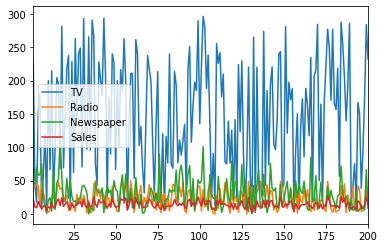

In [5]:
%matplotlib inline
adver_data.plot()

**Можно еще вот так визуализировать:**

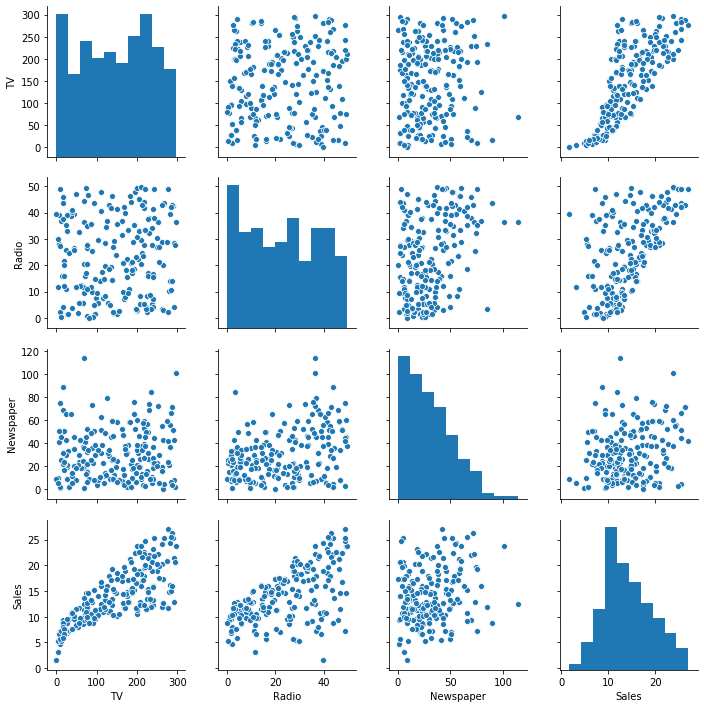

In [6]:
import seaborn as sns # библиотека для визуализаций

# Create the default pairplot
sns.pairplot(adver_data)

**Больше примеров использования функции pairplot:**
https://seaborn.pydata.org/generated/seaborn.pairplot.html

In [7]:
adver_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


**Создайте массивы NumPy *X* из столбцов TV, Radio и Newspaper и *y* - из столбца Sales. Используйте атрибут *values* объекта pandas DataFrame.**

In [9]:
import numpy as np
X = np.array(adver_data.values[:,0:3])
y = np.array(adver_data.values[:,3])

[[230.1  37.8  69.2]
 [ 44.5  39.3  45.1]
 [ 17.2  45.9  69.3]
 [151.5  41.3  58.5]
 [180.8  10.8  58.4]
 [  8.7  48.9  75. ]
 [ 57.5  32.8  23.5]
 [120.2  19.6  11.6]
 [  8.6   2.1   1. ]
 [199.8   2.6  21.2]]
[22.1 10.4  9.3 18.5 12.9  7.2 11.8 13.2  4.8 10.6]


In [11]:
y.shape, y[:5]

((200,), array([22.1, 10.4,  9.3, 18.5, 12.9]))

**Отмасштабируйте столбцы матрицы *X*, вычтя из каждого значения среднее по соответствующему столбцу и подели результат на стандартное отклонение.**  
В линейных моделях (а линейная регрессия - из таких) масштабирование признаков - важная процедура. Это поможет градиентному спуску быстрее сойтись, а также позволит нам интерпретировать найденные веса (параметры) модели как влияние каждого признака.
Больше про feature scaling можно почитать тут: https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e .
Мы вернёмся к этому, когда познакомимся со всеми основными методами в классическом машинном обучении (не глубоком).

In [12]:
X.shape

(200, 3)

In [13]:
means, stds = np.mean(X,axis=0), np.std(X, axis=0)

In [14]:
means

array([147.0425,  23.264 ,  30.554 ])

In [15]:
X = (X - means)/stds

**Проверяем, какое среднее и стандатное отклоненение нынче у Х:**

In [16]:
X.mean(axis=0), X.std(axis=0)

(array([ 1.22124533e-16, -4.52970994e-16,  2.22044605e-16]),
 array([1., 1., 1.]))

**Добавьте к матрице *X* столбец из единиц, используя методы *hstack*, *ones* и *reshape* библиотеки NumPy. Вектор из единиц нужен для того, чтобы не обрабатывать отдельно коэффициент $w_0$ линейной регрессии.**

In [17]:
n = np.shape(X)[0]
ones = np.reshape(np.ones(n),(n,1))

X = np.hstack((X,ones))

**2. Реализуйте функцию *mserror* - среднеквадратичную ошибку прогноза. Она принимает два аргумента - объекты Series *y* (значения целевого признака) и *y\_pred* (предсказанные значения).**

In [27]:
def mserror(y, y_pred):
    return np.mean((y-y_pred)**2)

**Какова среднеквадратичная ошибка прогноза значений Sales, если всегда предсказывать медианное значение Sales по исходной выборке?**  
результат этого этапа мы можем использовать как baseline модели. То есть, мы фиксируем ошибку при таком методе, а потом строим модель и сравниваем, стало ли лучше. 
Всега при построении модели нужно иметь baseline, чтоб понимать, удалось ли нам улучшить "топорный" метод с применением модели.

In [33]:
y_med = np.median(y)

mserror(y, y)


0.0

In [17]:
y_med

12.9

**3. Реализуйте функцию *normal_equation*, которая по заданным матрицам (массивам NumPy) *X* и *y* вычисляет вектор весов $\theta$ согласно нормальному уравнению линейной регрессии.**

In [18]:
np.dot(X.transpose(),X).shape

(4, 4)

In [19]:
def normal_equation(X, y):
    return np.linalg.solve(np.dot(X.transpose(),X),np.dot(X.transpose(),y))

In [20]:
norm_eq_weights = normal_equation(X, y)
norm_eq_weights

array([ 3.91925365,  2.79206274, -0.02253861, 14.0225    ])

**Какие продажи предсказываются линейной моделью с весами, найденными с помощью нормального уравнения, в случае средних инвестиций в рекламу по ТВ, радио и в газетах? (то есть при нулевых значениях масштабированных признаков TV, Radio и Newspaper).**

In [21]:
np.sum([0., 0., 0., 1.]*norm_eq_weights)

14.022500000000003

**4. Напишите функцию *linear_prediction*, которая принимает на вход матрицу *X* и вектор весов линейной модели $\theta$, а возвращает вектор прогнозов в виде линейной комбинации столбцов матрицы *X* с весами $\theta$.**

In [22]:
def linear_prediction(X, theta):
    return np.dot(X, theta)

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью нормального уравнения?**

In [23]:
lin_pred = linear_prediction(X, norm_eq_weights)
mserror(y, lin_pred)

2.784126314510936

**5. Реализуйте функцию *stochastic_gradient_step*, реализующая шаг стохастического градиентного спуска для линейной регрессии. Функция принимает матрицу *X*, вектора *y* и *$\theta$*, число *train_ind* - индекс объекта обучающей выборки (строки матрицы *X*), по которому считается изменение весов, а также число *$\alpha$* - шаг градиентного спуска (по умолчанию *alpha*=0.01). Результатом будет вектор обновленных весов.**

In [24]:
def stochastic_gradient_step(X, y, theta, train_ind, alpha=0.01):
    return theta + alpha / X.shape[0] * X[train_ind] * (y[train_ind] - linear_prediction(X[train_ind], theta))

**6. Функция *stochastic_gradient_descent реализует стохастический градиентный спуск для линейной регрессии. Функция принимает на вход следующие аргументы:**
- X - матрица, соответствующая обучающей выборке
- y - вектор значений целевого признака
- theta_init - вектор начальных весов модели
- alpha - шаг градиентного спуска (по умолчанию 0.01)
- max_iter - максимальное число итераций градиентного спуска (по умолчанию 10000)
- max_weight_dist - минимальное евклидово расстояние между векторами весов на соседних итерациях градиентного спуска,
при котором алгоритм прекращает работу (по умолчанию 1e-8)
- seed - число, используемое для воспроизводимости сгенерированных псевдослучайных чисел (по умолчанию 42)
- verbose - флаг печати информации (например, для отладки, по умолчанию False)

**На каждой итерации в вектор (список) должно записываться текущее значение среднеквадратичной ошибки. Функция должна возвращать вектор весов $\theta$, а также вектор (список) ошибок.**

In [25]:
def stochastic_gradient_descent(X, y, theta_init, alpha=1e-2, max_iter=1e4,
                                min_weight_dist=1e-8, seed=42, verbose=False):
    # Инициализируем расстояние между векторами весов на соседних
    # итерациях большим числом. 
    weight_dist = np.inf
    # Инициализируем вектор весов
    theta = theta_init
    # Сюда будем записывать ошибки на каждой итерации
    errors = []
    # Счетчик итераций
    iter_num = 0
    # Будем порождать псевдослучайные числа 
    # (номер объекта, который будет менять веса), а для воспроизводимости
    # этой последовательности псевдослучайных чисел используем seed.
    np.random.seed(seed)
        
    # Основной цикл
    while weight_dist > min_weight_dist and iter_num < max_iter:
        # порождаем псевдослучайный 
        # индекс объекта обучающей выборки
        random_ind = np.random.randint(X.shape[0])
        
        theta_new = stochastic_gradient_step(X, y, theta, random_ind, alpha)
        weight_dist = np.linalg.norm(theta - theta_new)
        theta = theta_new
        errors.append(mserror(y, linear_prediction(X, theta)))
        iter_num += 1

        
    return theta, errors

 **Запустите $10^5$ итераций стохастического градиентного спуска. Укажите вектор начальных весов *theta_init*, состоящий из нулей. Оставьте параметры  *alpha* и *seed* равными их значениям по умолчанию (*alpha*=0.01, *seed*=42 - это важно для проверки ответов).**

In [26]:
%%time
stoch_grad_desc_weights, stoch_errors_by_iter = stochastic_gradient_descent(X, y, np.zeros(X.shape[1]),max_iter=1e5)

CPU times: user 2.36 s, sys: 28.9 ms, total: 2.39 s
Wall time: 2.33 s


Populating the interactive namespace from numpy and matplotlib


/home/user/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['ones']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


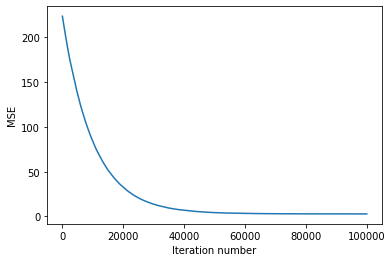

In [28]:
%pylab inline
plot(range(len(stoch_errors_by_iter)), stoch_errors_by_iter)
xlabel('Iteration number')
ylabel('MSE')
show()

**Посмотрим на вектор весов, к которому сошелся метод.**

In [29]:
stoch_grad_desc_weights

array([ 3.90900941,  2.72815222,  0.02019018, 13.92645619])

**А веса, найденные решением normal equations были следующими:**

In [30]:
print(norm_eq_weights)

[ 3.91925365  2.79206274 -0.02253861 14.0225    ]


**Посмотрим на среднеквадратичную ошибку на последней итерации.**

In [31]:
stoch_errors_by_iter[-1]

2.797454166468059

**Какова среднеквадратичная ошибка прогноза значений Sales в виде линейной модели с весами, найденными с помощью градиентного спуска?**

In [32]:
mserror(y, linear_prediction(X, stoch_grad_desc_weights))

2.797454166468059